# Python空間癌症群聚地圖視覺化
## 許sir
#### (目標授課時數: 6小時)

## 講授大綱
- PART 1:資料ETL Ⅰ
- PART 2:資料ETL Ⅱ
- PART 3:地理圖資展示
- PART 4:空間自相關

>## [準備工作]

- 資料來源：癌症死因統計資料: https://data.gov.tw/dataset/8154
- 資料更新時間: 2019/08/14

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
cancer_death = pd.read_csv('data/cancer105.csv') #這是各鄉鎮癌症的資料集
cancer_death.head() #列出前五行

,year,county,cause,sex,age_code,N
0,107,101,1,1,16,1
1,107,101,1,1,18,1
2,107,101,1,1,19,3
3,107,101,1,1,20,1
4,107,101,1,1,21,1


In [3]:
#將另一筆 "100年~鄉鎮市區" 的檔案叫近來
county_code = pd.read_csv('data/County_Code_100.csv') #這是各鄉鎮的 county code
county_code.head()

,county,100年~鄉鎮市區
0,101,臺北市松山區
1,102,臺北市大安區
2,109,臺北市大同區
3,110,臺北市中山區
4,111,臺北市內湖區


從county_code 裡，我們可以看到每個代碼所代表的地區名稱。要如何把這資訊加到cancer_death這個資料表裡呢 ? Pandas 裡的 merge 函式，可以達到這個需求 。以 cancer_death裡 county 這欄位和 county_code 表格裡 county 欄位為key，將這兩個表結合

>## [PART 1]: 資料ETL Ⅰ

### 1-1. Merge函數

In [4]:
#利用merge將兩份表格合併
#轉換 county 這個欄位為實際地名
cancer_death_new = pd.merge(left=cancer_death, right=county_code, left_on='county',right_on='county')
cancer_death_new.head()  #列出前五行

,year,county,cause,sex,age_code,N,100年~鄉鎮市區
0,107,101,1,1,16,1,臺北市松山區
1,107,101,1,1,18,1,臺北市松山區
2,107,101,1,1,19,3,臺北市松山區
3,107,101,1,1,20,1,臺北市松山區
4,107,101,1,1,21,1,臺北市松山區


In [5]:
#載入癌症代碼與名稱對照表
cancer_code = pd.read_csv('data/CancerCode_97.csv')
cancer_code.head()

,97年以後cause,死因分類,ICD-10
0,1,口腔癌,"C00-C06, C09-C10, C12-C14"
1,2,主唾液腺癌,C07-C08
2,3,鼻咽癌,C11
3,4,食道癌,C15
4,5,胃癌,C16


In [6]:
#不需要ICD-10這欄位，所以把這欄位去掉
cancer_code=cancer_code.drop(['ICD-10'], axis=1)

In [7]:
#和 cancer_code 這表格結合在一起，前者是以 'cause' 為key，後者是以' 97年以後cause'為key
cancer_death_new1=pd.merge(left=cancer_death_new, right=cancer_code, left_on='cause',right_on='97年以後cause')
cancer_death_new1.head()

,year,county,cause,sex,age_code,N,100年~鄉鎮市區,97年以後cause,死因分類
0,107,101,1,1,16,1,臺北市松山區,1,口腔癌
1,107,101,1,1,18,1,臺北市松山區,1,口腔癌
2,107,101,1,1,19,3,臺北市松山區,1,口腔癌
3,107,101,1,1,20,1,臺北市松山區,1,口腔癌
4,107,101,1,1,21,1,臺北市松山區,1,口腔癌


### 1-2. 基本敘述性統計

In [8]:
print(cancer_death_new1.shape)# 印出資料維度

(29417, 9)


In [9]:
cancer_death_new1['死因分類'].value_counts() #次數分配

氣管、支氣管和肺癌              3964
肝和肝內膽管癌                3732
結腸、直腸和肛門癌              3154
其他癌症                   2059
口腔癌                    1760
胃癌                     1707
胰臟癌                    1629
女性乳房癌                  1309
食道癌                    1279
非何杰金氏淋巴瘤                977
白血病                     967
前列腺(攝護腺)癌               848
膀胱癌                     827
腎臟癌                     567
腦癌                      562
鼻咽癌                     560
子宮頸及部位未明示子宮癌            542
卵巢癌                     513
膽囊和其他膽道癌                505
間皮和軟組織癌                 407
子宮體癌                    335
黑色素瘤和其他皮膚癌              271
喉癌                      195
甲狀腺癌                    183
小腸癌                     143
胸腺癌                     102
骨和關節軟骨癌                  81
主唾液腺癌                    58
鼻腔、中耳和副鼻竇癌               57
心臟、縱隔和胸(肋)膜癌             57
男性生殖器官癌(攝護腺除外)           39
腦膜及中樞神經系統其他部份癌(腦除外)      20
何杰金氏症                     8
Name: 死因分類, dtype: int64

#### 我們可以看出，前三大死因是
- 氣管、支氣管和肺癌           3964
- 肝和肝內膽管癌               3732
- 結腸、直腸和肛門癌           3154 

In [10]:
Cross0 = pd.crosstab(cancer_death_new1['死因分類'], cancer_death_new1['sex']) #建立交叉列聯表
Cross0

sex,1,2
死因分類,,
主唾液腺癌,43,15
何杰金氏症,8,0
其他癌症,1172,887
前列腺(攝護腺)癌,848,0
卵巢癌,0,513
口腔癌,1528,232
喉癌,186,9
女性乳房癌,0,1309
子宮頸及部位未明示子宮癌,0,542


### 1-3. 基礎資料視覺化

In [11]:
#基礎設定
from matplotlib.font_manager import FontProperties
import seaborn as sns
myfont=FontProperties(fname=r'C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\msj.ttf',size=14)
sns.set(font=myfont.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

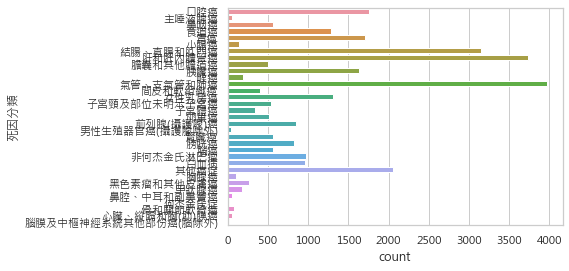

In [12]:
sns.countplot(y = "死因分類", data=cancer_death_new1)# 次數分配，countplot放屬質資料

>## [PART 2]: 資料ETL Ⅱ

### 2-1. 欄位分割

In [13]:
#我們回來看一次當初癌症的資料集
#你會發現鄉鎮市區是連在一起的
#但一般的面圖層資料，縣市與鄉鎮是分開的
cancer_death_new1.head()

,year,county,cause,sex,age_code,N,100年~鄉鎮市區,97年以後cause,死因分類
0,107,101,1,1,16,1,臺北市松山區,1,口腔癌
1,107,101,1,1,18,1,臺北市松山區,1,口腔癌
2,107,101,1,1,19,3,臺北市松山區,1,口腔癌
3,107,101,1,1,20,1,臺北市松山區,1,口腔癌
4,107,101,1,1,21,1,臺北市松山區,1,口腔癌


In [14]:
#所以我們需要將"100年~鄉鎮市區"這個欄位，拆成兩個欄位
#以方便 maping

cancer_death_new1['city'] = cancer_death_new1['100年~鄉鎮市區'].copy(deep=True)
cancer_death_new1['city'] = cancer_death_new1['city'].apply(lambda t: t[:3])

cancer_death_new1['district'] = cancer_death_new1['100年~鄉鎮市區'].copy(deep=True)
cancer_death_new1['district'] = cancer_death_new1['district'].apply(lambda t: t[3:])

In [15]:
cancer_death_new1.head()

,year,county,cause,sex,age_code,N,100年~鄉鎮市區,97年以後cause,死因分類,city,district
0,107,101,1,1,16,1,臺北市松山區,1,口腔癌,臺北市,松山區
1,107,101,1,1,18,1,臺北市松山區,1,口腔癌,臺北市,松山區
2,107,101,1,1,19,3,臺北市松山區,1,口腔癌,臺北市,松山區
3,107,101,1,1,20,1,臺北市松山區,1,口腔癌,臺北市,松山區
4,107,101,1,1,21,1,臺北市松山區,1,口腔癌,臺北市,松山區


#### 我們經由前面的敘述性統計可以發現
- 氣管、支氣管和肺癌 3964
- 肝和肝內膽管癌 3732
- 結腸、直腸和肛門癌 3154

#### 同時，在以上三個癌症中，男女有別的是
- 氣管、支氣管和肺癌(	2249/	1715)
- 肝和肝內膽管癌(	2274/	1458)
- 結腸、直腸和肛門癌(	1726/	1428)

In [16]:
#我們現在有City的欄位了，我們來看看23縣市中，哪些縣市癌症明顯偏多

Cross1 = pd.crosstab(cancer_death_new1['死因分類'], cancer_death_new1['city']) #建立交叉列聯表
Cross1

city,南投縣,嘉義市,嘉義縣,基隆市,宜蘭縣,屏東縣,彰化縣,新北市,新竹市,新竹縣,...,臺中市,臺北市,臺南市,臺東縣,花蓮縣,苗栗縣,連江縣,金門縣,雲林縣,高雄市
死因分類,,,,,,,,,,,,,,,,,,,,,
主唾液腺癌,0,0,1,2,2,4,7,8,1,1,...,4,10,5,3,0,0,0,0,1,5
何杰金氏症,0,0,1,0,0,0,0,3,0,0,...,1,1,0,1,0,0,0,0,0,1
其他癌症,72,22,84,41,48,103,147,213,35,52,...,232,178,214,33,41,76,0,7,82,239
前列腺(攝護腺)癌,28,5,29,17,26,50,57,80,13,23,...,99,69,92,16,23,29,0,4,39,91
卵巢癌,12,10,25,16,8,23,22,74,5,7,...,66,57,53,3,7,14,1,4,14,56
口腔癌,61,18,81,33,41,122,152,177,23,40,...,185,100,150,38,50,59,0,8,107,201
喉癌,5,4,7,3,2,14,15,29,5,4,...,20,17,9,5,0,3,0,1,5,30
女性乳房癌,38,13,39,35,37,62,84,158,25,32,...,154,113,137,17,24,40,0,10,46,153
子宮頸及部位未明示子宮癌,15,8,13,13,13,25,33,84,14,13,...,51,53,39,8,12,11,0,4,17,79


### 我們發現，新北市、台中市、高雄市、台北市，在這三種癌症的死亡人口上，有非常明顯的差異，但"發生"的機率真的有比較高嗎?

### 2-2. 癌症發生機率
- 資料來源: 癌症發生統計(https://data.gov.tw/dataset/6399)
- 資料說明: 台灣在民國68-105年各縣市的癌症發生率資料 (CSV格式)
- 資料日期: 2019/07/26
- 資料欄位包括:
    - Year: 癌症診斷年、
    - Gender: 性別、
    - County: 縣市別、
    - Cancer: 癌症別、
    - WHO2000: 年齡標準化發生率 WHO 2000世界標準人口 (每10萬人口)、
    - Count: 癌症發生數、
    - AgeAvg: 平均年齡、
    - AgeMed: 年齡中位數、
    - IncidenceRate: 粗率 (每10萬人口)

#### [補充說明]. 
- 一般提到的死亡率或出生率係指粗死亡率、粗出生率，也就是未經過校正的比率，最常用的校正是性別、年齡別的校正
- 例如在89年屏東縣共有124名男性發生大腸直腸癌，而該年的年中人口數為4,730,928，因此該年屏東縣的粗發生率=124/(4730928*1)=每十萬人 26.16

In [17]:
cancer_data = pd.read_csv('data/Cancer_1979-2016.csv')

In [18]:
#因為只需要粗發生率，先把不需要的欄位去掉
cancer_data=cancer_data.drop(['WHO2000','Count','AgeAvg','AgeMed'], axis=1)
cancer_data.tail(15)

,Year,Gender,County,Cancer,IncidenceRate
87775,2016,女,金門縣,膀胱,5.92
87776,2016,女,金門縣,腎,1.48
87777,2016,女,金門縣,腦,4.44
87778,2016,女,金門縣,甲狀腺,7.40
87779,2016,女,金門縣,非何杰金氏淋巴瘤,2.96
87780,2016,女,金門縣,漿細胞瘤,2.96
87781,2016,女,金門縣,全癌症,165.82
87782,2016,女,連江縣,肝及肝內膽管,18.46
87783,2016,女,連江縣,膽囊及肝外膽管,18.46
87784,2016,女,連江縣,肺、支氣管及氣管,110.76


In [19]:
cancer_list = cancer_data['Cancer'].unique() #我想知道到底有多少種癌症
cancer_list  # 顯示結果

array(['口腔、口咽及下咽', '主唾液腺', '鼻咽', '食道', '胃', '小腸', '結直腸', '肝及肝內膽管',
       '膽囊及肝外膽管', '胰', '後腹膜腔及腹膜', '消化器官其他分界不明部位', '鼻腔、中耳及副鼻竇', '喉',
       '肺、支氣管及氣管', '胸膜', '胸腺、心臟與中隔', '骨、關節及關節軟骨', '結締組織、皮下組織及其他軟組織', '皮膚',
       '女性乳房', '男性乳房', '子宮', '子宮頸', '子宮體', '卵巢、輸卵管及寬韌帶', '其他女性生殖器官',
       '攝護腺', '睪丸', '其他男性生殖器官', '膀胱', '腎', '腎盂及其他泌尿系統', '眼及淚腺', '腦',
       '其他神經系統', '甲狀腺', '其他內分泌腺', '其他分界不明的部位', '不明原發部位', '何杰金氏淋巴瘤', '白血病',
       '非何杰金氏淋巴瘤', '漿細胞瘤', '全癌症', '呼吸系統與胸內器官之其他分界不明部位'], dtype=object)

In [20]:
##因為此資料集最後年份只到 2016，和我們的目標2018有差距，逼不得已以最後2016的資料觀察
##目前我只需要 2016年(民國105)年的資料
cancer_data2016 = cancer_data[cancer_data['Year']>2015]
cancer_data2016.head(15)


,Year,Gender,County,Cancer,IncidenceRate
85332,2016,不分性別,台閩地區,口腔、口咽及下咽,33.16
85333,2016,不分性別,台閩地區,主唾液腺,1.25
85334,2016,不分性別,台閩地區,鼻咽,6.45
85335,2016,不分性別,台閩地區,食道,11.09
85336,2016,不分性別,台閩地區,胃,15.54
85337,2016,不分性別,台閩地區,小腸,1.69
85338,2016,不分性別,台閩地區,結直腸,65.31
85339,2016,不分性別,台閩地區,肝及肝內膽管,47.05
85340,2016,不分性別,台閩地區,膽囊及肝外膽管,4.64
85341,2016,不分性別,台閩地區,胰,9.35


In [21]:
print(cancer_data2016.shape)# 印出資料維度

(2458, 5)


### 2-3. Aggregate功能

#### [還記得嗎]
在之前我們到三個癌症中，男女有別的是
- 氣管、支氣管和肺癌( 2249/ 1715)
- 肝和肝內膽管癌( 2274/ 1458)
- 結腸、直腸和肛門癌( 1726/ 1428)

#### 所以男生發生的人數比較多，但"機率"真的比較高嗎?

In [22]:
#依據"粗率"及"縣市"進行加總，同時只看男性

index = 0
for cancer in cancer_list:
    TT=cancer_data2016.loc[(cancer_data2016['Gender']=='男') &  
        (cancer_data2016['Cancer']==cancer)].groupby(['County']).mean()
    TT=TT.drop(['Year'], axis=1) #計算平均後就不需要年份了
    TT.rename(columns = {'IncidenceRate': cancer}, inplace=True) #改欄位名稱
    if (index==0):
        result = TT
    else:
        result=result.join(TT)
    index=index+1

In [23]:
result=result.fillna(0)#沒有資料的填補0


In [24]:
result

,口腔、口咽及下咽,主唾液腺,鼻咽,食道,胃,小腸,結直腸,肝及肝內膽管,膽囊及肝外膽管,胰,...,甲狀腺,其他內分泌腺,其他分界不明的部位,不明原發部位,何杰金氏淋巴瘤,白血病,非何杰金氏淋巴瘤,漿細胞瘤,全癌症,呼吸系統與胸內器官之其他分界不明部位
County,,,,,,,,,,,,,,,,,,,,,
南投縣,79.15,2.32,9.27,23.94,17.38,1.54,65.25,66.41,5.02,12.36,...,5.02,0.00,0.39,4.63,0.00,10.43,10.81,3.86,500.41,0.0
台中市,58.33,0.81,9.22,21.30,15.44,2.42,73.34,58.92,4.39,9.08,...,5.93,0.73,0.00,4.54,0.51,10.03,11.42,3.51,448.87,0.0
台北市,30.86,1.86,7.06,11.48,22.57,2.17,79.02,44.28,6.20,11.09,...,11.71,0.16,0.00,4.89,1.16,11.17,15.12,3.64,460.64,0.0
台南市,57.79,1.48,10.50,16.65,18.45,1.91,80.69,85.89,5.83,9.23,...,7.32,0.11,0.00,3.71,0.74,12.41,13.04,1.59,538.02,0.0
台東縣,101.57,0.00,28.90,36.78,23.64,1.75,56.92,59.54,4.38,9.63,...,1.75,1.75,0.00,7.88,0.88,9.63,11.38,2.63,535.88,0.0
台閩地區,60.96,1.43,9.78,20.74,19.68,2.00,74.29,65.53,4.66,10.07,...,7.67,0.38,0.03,4.15,1.07,10.68,11.94,2.91,485.13,0.0
嘉義市,72.29,1.52,6.85,16.74,14.46,3.04,82.95,85.99,3.04,14.46,...,8.37,0.00,0.00,3.80,1.52,9.89,6.85,3.04,521.27,0.0
嘉義縣,100.33,0.75,8.95,33.94,15.29,2.61,84.67,107.42,6.34,8.95,...,5.59,0.75,0.00,4.85,0.75,15.29,13.05,4.10,651.60,0.0
基隆市,51.47,1.61,11.79,27.88,32.70,1.61,63.26,65.41,6.43,10.72,...,5.36,0.00,0.00,4.83,0.54,10.19,10.72,1.61,478.22,0.0


In [25]:
result2=result.transpose() #我們轉置之後比較容易查詢
result2

County,南投縣,台中市,台北市,台南市,台東縣,台閩地區,嘉義市,嘉義縣,基隆市,宜蘭縣,...,新竹市,新竹縣,桃園市,澎湖縣,花蓮縣,苗栗縣,連江縣,金門縣,雲林縣,高雄市
口腔、口咽及下咽,79.15,58.33,30.86,57.79,101.57,60.96,72.29,100.33,51.47,65.60,...,41.63,42.85,43.95,37.63,83.74,57.89,13.93,8.88,99.73,74.76
主唾液腺,2.32,0.81,1.86,1.48,0.00,1.43,1.52,0.75,1.61,1.73,...,1.85,0.71,1.77,0.00,1.78,2.43,0.00,0.00,1.11,1.60
鼻咽,9.27,9.22,7.06,10.50,28.90,9.78,6.85,8.95,11.79,10.36,...,7.86,6.78,9.33,7.53,15.44,9.71,13.93,1.48,6.09,10.66
食道,23.94,21.30,11.48,16.65,36.78,20.74,16.74,33.94,27.88,31.93,...,13.88,11.78,18.20,22.58,39.79,28.77,27.86,16.28,23.27,22.91
胃,17.38,15.44,22.57,18.45,23.64,19.68,14.46,15.29,32.70,26.76,...,19.43,10.36,19.60,7.53,31.48,15.60,27.86,5.92,20.78,18.78
小腸,1.54,2.42,2.17,1.91,1.75,2.00,3.04,2.61,1.61,2.59,...,1.39,1.79,1.49,1.88,2.97,1.73,0.00,0.00,1.94,2.32
結直腸,65.25,73.34,79.02,80.69,56.92,74.29,82.95,84.67,63.26,68.19,...,56.89,62.85,60.94,65.85,70.08,79.73,27.86,29.60,74.80,82.52
肝及肝內膽管,66.41,58.92,44.28,85.89,59.54,65.53,85.99,107.42,65.41,78.54,...,53.65,42.50,47.22,79.02,65.33,59.63,55.73,31.08,119.67,83.17
膽囊及肝外膽管,5.02,4.39,6.20,5.83,4.38,4.66,3.04,6.34,6.43,5.61,...,4.16,1.79,3.55,3.76,5.94,3.47,0.00,0.00,4.71,5.22
胰,12.36,9.08,11.09,9.23,9.63,10.07,14.46,8.95,10.72,8.20,...,12.03,8.93,8.59,15.05,10.10,10.05,13.93,4.44,11.36,11.38


In [26]:
result2[['台北市','台中市','新北市','高雄市']] #只看我們有興趣的四個城市

County,台北市,台中市,新北市,高雄市
口腔、口咽及下咽,30.86,58.33,55.83,74.76
主唾液腺,1.86,0.81,1.33,1.60
鼻咽,7.06,9.22,10.71,10.66
食道,11.48,21.30,18.75,22.91
胃,22.57,15.44,21.87,18.78
小腸,2.17,2.42,1.59,2.32
結直腸,79.02,73.34,75.60,82.52
肝及肝內膽管,44.28,58.92,56.14,83.17
膽囊及肝外膽管,6.20,4.39,3.69,5.22
胰,11.09,9.08,9.83,11.38


#### [還記得嗎]
在之前我們到三個癌症中，依縣市別(台北市/台中市/新北市/高雄市)發生在"男性"的粗發生率為
- 氣管、支氣管和肺癌( 68.01/	57.89/	63.26/	64.17)
- 肝和肝內膽管癌( 44.28/	58.92/	56.14/	83.17)
- 結腸、直腸和肛門癌( 79.02/	73.34/	75.60/	82.52)

#### 你會發現，在男性的粗發生率上，高雄市名列前茅

## 2-4. 高雄市的"結腸、直腸和肛門癌"地理資料合併
- 目標是高雄市的資料，所以要從"鄉鎮市區"欄位裡把所在的縣市挑出來才能比較：


In [27]:
Kaohsiung_cancer_death=cancer_death_new1[cancer_death_new1['city']=='高雄市']
Kaohsiung_cancer_death.head()  #列出前五行

,year,county,cause,sex,age_code,N,100年~鄉鎮市區,97年以後cause,死因分類,city,district
435,107,701,1,1,15,5,高雄市鳳山區,1,口腔癌,高雄市,鳳山區
436,107,701,1,1,16,8,高雄市鳳山區,1,口腔癌,高雄市,鳳山區
437,107,701,1,1,17,10,高雄市鳳山區,1,口腔癌,高雄市,鳳山區
438,107,701,1,1,18,7,高雄市鳳山區,1,口腔癌,高雄市,鳳山區
439,107,701,1,1,19,10,高雄市鳳山區,1,口腔癌,高雄市,鳳山區


In [28]:
print(Kaohsiung_cancer_death.shape)# 印出資料維度

(3405, 11)


In [29]:
#找出只有男生的資料
Kaohsiung_cancer_death_M = Kaohsiung_cancer_death[Kaohsiung_cancer_death['sex']==1]
Kaohsiung_cancer_death_M.head()

,year,county,cause,sex,age_code,N,100年~鄉鎮市區,97年以後cause,死因分類,city,district
435,107,701,1,1,15,5,高雄市鳳山區,1,口腔癌,高雄市,鳳山區
436,107,701,1,1,16,8,高雄市鳳山區,1,口腔癌,高雄市,鳳山區
437,107,701,1,1,17,10,高雄市鳳山區,1,口腔癌,高雄市,鳳山區
438,107,701,1,1,18,7,高雄市鳳山區,1,口腔癌,高雄市,鳳山區
439,107,701,1,1,19,10,高雄市鳳山區,1,口腔癌,高雄市,鳳山區


In [30]:
#其中'cause'、'county'、'sex'、'97年以後cause'、'city' 這幾個欄位都不需要了

Kaohsiung_cancer_death_M=Kaohsiung_cancer_death_M.drop(['cause','county','sex','97年以後cause','city'],axis=1)
Kaohsiung_cancer_death_M.head()

,year,age_code,N,100年~鄉鎮市區,死因分類,district
435,107,15,5,高雄市鳳山區,口腔癌,鳳山區
436,107,16,8,高雄市鳳山區,口腔癌,鳳山區
437,107,17,10,高雄市鳳山區,口腔癌,鳳山區
438,107,18,7,高雄市鳳山區,口腔癌,鳳山區
439,107,19,10,高雄市鳳山區,口腔癌,鳳山區


In [31]:
#找出只有結腸、直腸和肛門癌的部份

Kaohsiung_Colorectal_cancer_M=Kaohsiung_cancer_death_M[Kaohsiung_cancer_death_M['死因分類']=='結腸、直腸和肛門癌']
Kaohsiung_Colorectal_cancer_M.head()

,year,age_code,N,100年~鄉鎮市區,死因分類,district
6444,107,10,1,高雄市鳳山區,結腸、直腸和肛門癌,鳳山區
6445,107,13,1,高雄市鳳山區,結腸、直腸和肛門癌,鳳山區
6446,107,14,1,高雄市鳳山區,結腸、直腸和肛門癌,鳳山區
6447,107,15,1,高雄市鳳山區,結腸、直腸和肛門癌,鳳山區
6448,107,16,6,高雄市鳳山區,結腸、直腸和肛門癌,鳳山區


In [32]:
#把不會用到的 colume 去掉
Kaohsiung_Colorectal_cancer_M=Kaohsiung_Colorectal_cancer_M.drop(Kaohsiung_Colorectal_cancer_M.columns[[0,1,5]], axis=1)
Kaohsiung_Colorectal_cancer_M.head()

,N,100年~鄉鎮市區,死因分類
6444,1,高雄市鳳山區,結腸、直腸和肛門癌
6445,1,高雄市鳳山區,結腸、直腸和肛門癌
6446,1,高雄市鳳山區,結腸、直腸和肛門癌
6447,1,高雄市鳳山區,結腸、直腸和肛門癌
6448,6,高雄市鳳山區,結腸、直腸和肛門癌


In [33]:
#同鄉鎮的人數加總

Kaohsiung_Colorectal_cancer_M_sum=Kaohsiung_Colorectal_cancer_M.groupby('100年~鄉鎮市區').sum()
Kaohsiung_Colorectal_cancer_M_sum.head()

,N
100年~鄉鎮市區,
高雄市三民區,50
高雄市仁武區,11
高雄市內門區,4
高雄市六龜區,3
高雄市前金區,6


#### 上圖的結果，地區名變成 index了，在 index 欄裡的值無法作操作，所以要先把 index 複製成一個新的欄位，才能做操作。

In [34]:
Kaohsiung_Colorectal_cancer_M_sum['District']=Kaohsiung_Colorectal_cancer_M_sum.index

Kaohsiung_Colorectal_cancer_M_sum['District']=Kaohsiung_Colorectal_cancer_M_sum['District'].apply(lambda t: t[3:])
Kaohsiung_Colorectal_cancer_M_sum.head()

,N,District
100年~鄉鎮市區,,
高雄市三民區,50,三民區
高雄市仁武區,11,仁武區
高雄市內門區,4,內門區
高雄市六龜區,3,六龜區
高雄市前金區,6,前金區


>## [PART 3]. 地理圖資展示

### [補充1]  在開始使用地理資料之前，我們必須要灌入geopandas
- geopandas這個套件，是 pandas 的擴充，pandas適合處理 csv 格式資料，再配合 geopandas，畫出"靜態"的資訊地圖非常簡單。
- 但是geopandas安裝上常常會出現困難，建議可參考此網頁(https://anaconda.org/conda-forge/geopandas)

<img src="images/geopandas.JPG" width="90%">

### [補充2] 要畫出地圖，首先要得到各行政區邊界的資訊。
- 從政府開放資料平臺可以得到行政區域界線圖資(https://data.gov.tw/dataset/7441)
- 這是以 shape file (shp)格式儲存。
- geopandas 可以直接讀取 shp 檔案。
- 資料更新時間: 2019/12/03

<img src="images/CRS.JPG" width="70%">

### 3-1. 圖資讀取及座標轉換

In [35]:
%pylab inline
%matplotlib inline
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib as mpl

import geopandas as gpd
import pandas as pd
import shapely
from descartes import PolygonPatch


Populating the interactive namespace from numpy and matplotlib


In [36]:
town_shp = gpd.read_file('TW97 shp/TOWN_MOI_1081121.shp',encoding='utf-8') #呼叫台灣圖資
town_shp

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."
...,...,...,...,...,...,...,...,...
363,D22,67000150,臺南市,七股區,Qigu District,D,67000,"POLYGON ((120.13989 23.19585, 120.14003 23.195..."
364,D23,67000160,臺南市,將軍區,Jiangjun District,D,67000,"POLYGON ((120.08374 23.24056, 120.08470 23.239..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.22256 24.94984, 121.22259 24.949..."
366,E02,64000020,高雄市,鼓山區,Gushan District,E,64000,"POLYGON ((120.27878 22.67380, 120.27891 22.673..."


### [投影系統]
- 為了製造地圖，人們必須把近似橢球狀的地球投影到平面上，這個坐標系統稱作投影坐標系統，只要是地圖，一定會採用投影系統。
- 投影系統一定都是有一好沒兩好，只有最適合的投影，沒有最好的投影

### [座標系統]
- 新國家坐標系統之名稱命名為1997臺灣大地基準（TWD97）
- 臺灣、琉球嶼、綠島、蘭嶼及龜山島等地區之投影方式採用橫麥卡托投影經差二度分帶，其中央子午線為東經121度
- 「二度分帶」係將地表每隔二度切為一個投影帶，因為切割更細，所以其投影誤差也更小(約 1/10000 左右)，且台灣本島剛好都在同一投影帶內，不會造成使用上不便，因此一直沿用至今，成為國內製作各種圖籍的標準。也因為切割較細，使得台灣、澎湖、彭佳嶼、釣魚台分別屬於不同投影帶。

<img src="images/grid_02da.JPG" width="70%">

### [小結論]
- TWD97採橫麥卡托二度分帶，且分兩種投影帶(台灣本島121分帶、澎湖金門馬祖119分帶)

### [EPSG 座標編碼]
為了方便世界各國的坐標系統的轉換及辨識，一般使用EPSG Wkid來為坐標系統取代號，EPSG是(European Petroleum Survey Group) 的縮寫，EPSG定義了世界各國投影、坐標系統一系列的編號WKID(Well Known ID)，在台灣的我們常使用的編碼如下:
- WMS,WMTS等常使用的Web Mercator :EPSG:3857
- kml, geojson默認使用的WGS84:EPSG:4326
- TWD97 121分帶:EPSG:3826
- TWD97 119分帶:EPSG:3825
- TWD67 121分帶(台灣舊系統):EPSG:3828
- TWD67 119分帶(台灣舊系統):EPSG:3827

In [37]:
#town_shp.crs = {'init' :'epsg:4326'}   # 指定這個檔案正確的投影系統，（暫時性）覆蓋原來的投影

town_shp = town_shp.to_crs(epsg=3826)  # 投影到 twd97
town_shp

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((291944.972 2568005.402, 291947.739 2..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((203529.205 2484633.755, 203536.648 2..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((178880.155 2634848.096, 178879.887 2..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((300508.997 2508651.254, 300540..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((313195.145 2427360.755, 313147..."
...,...,...,...,...,...,...,...,...
363,D22,67000150,臺南市,七股區,Qigu District,D,67000,"POLYGON ((161953.371 2566231.291, 161968.169 2..."
364,D23,67000160,臺南市,將軍區,Jiangjun District,D,67000,"POLYGON ((156236.703 2571217.076, 156334.146 2..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((272474.366 2760240.259, 272477.683 2..."
366,E02,64000020,高雄市,鼓山區,Gushan District,E,64000,"POLYGON ((175888.734 2508343.133, 175901.648 2..."


### 3-2. SHP圖層展示

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


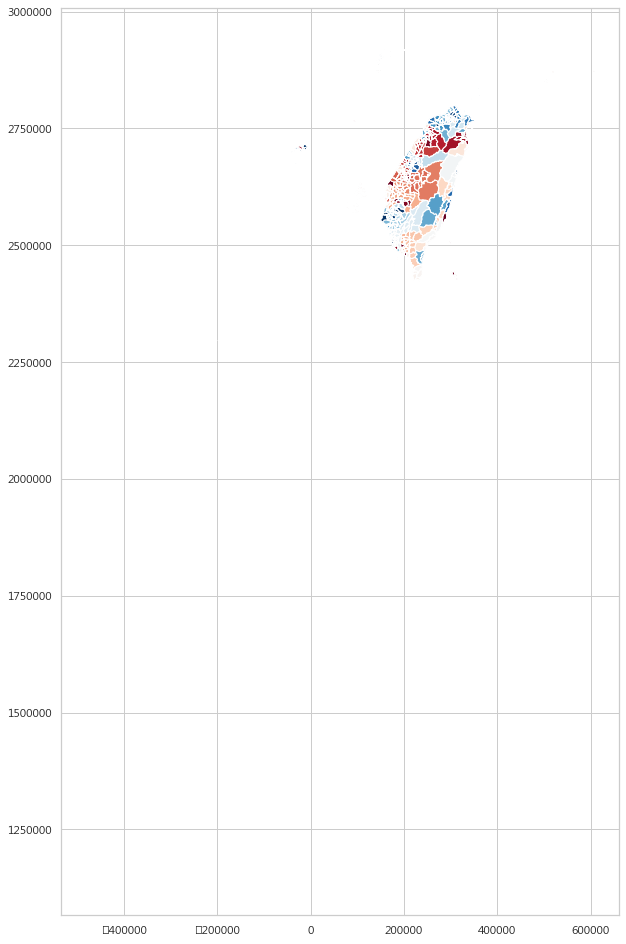

In [38]:
mpl.rcParams['figure.figsize'] = (10.0, 20.0)
town_shp.plot(cmap='RdBu')

#### 你會發現，圖實在太小，沒辦法滿版的原因在於 shapefile 的範圍很大，包括金門馬祖，所以 matplotlib 自動想要把所有資料放進去，就出現把地圖縮小的結果。因此我們必須特別設定台灣的範圍

#### [有趣的小工具] 
- 國土測繪中心 (https://whgis.nlsc.gov.tw/GisMap/NLSCGisMap.aspx)
- WGS84: 台灣本島地區E的範圍約119.5 – 122.5；N的範圍約21.5-25.5
- TWD97: 台灣本島地區E的範圍約140000 – 355000；N的範圍約2388585 – 2824514


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


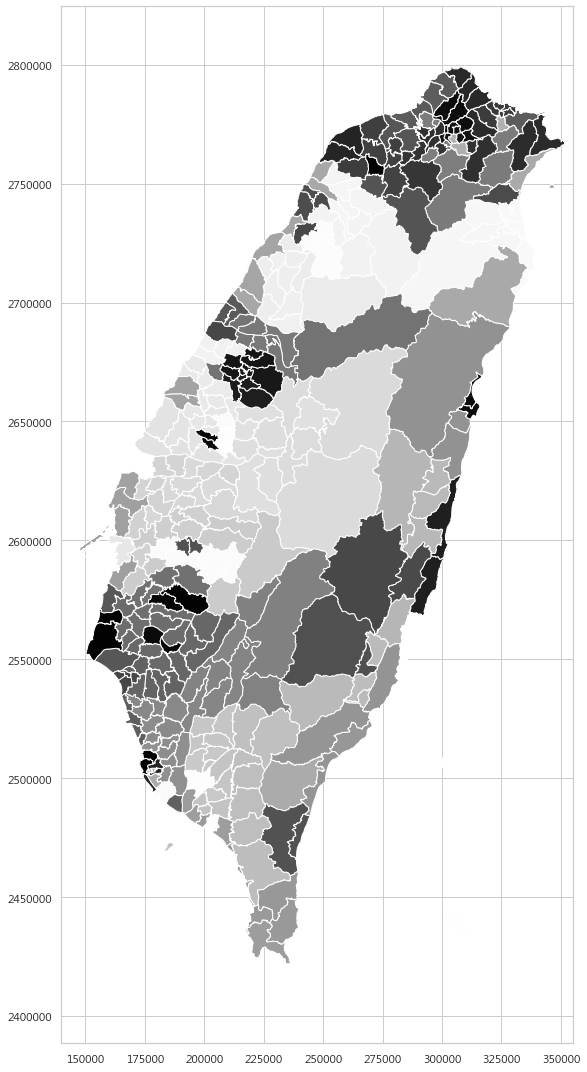

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10,15)) # 定義畫布大小，其中(1,1)代表一行一列，即為一組座標
town_shp.plot(cmap='Greys', ax=ax)
ax.set_xlim([ 140000, 355000]) # 這行設定 X 範圍
ax.set_ylim([ 2388585, 2824514]) # 這行設定 Y 範圍
plt.tight_layout() # 加這行去把圖盡可能推展到 10,15 的版面


In [40]:
#篩選出高雄市的圖資
Kaohsiung_town_shp=town_shp[town_shp['COUNTYNAME']=='高雄市']
Kaohsiung_town_shp.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
17,E11,64000110,高雄市,小港區,Xiaogang District,E,64000,"POLYGON ((178457.811 2494180.810, 178500.382 2..."
155,E01,64000010,高雄市,鹽埕區,Yancheng District,E,64000,"POLYGON ((176604.285 2503682.357, 176606.124 2..."
156,E06,64000060,高雄市,新興區,Xinxing District,E,64000,"POLYGON ((179770.401 2503950.256, 179765.792 2..."
157,E07,64000070,高雄市,前金區,Qianjin District,E,64000,"POLYGON ((178264.025 2502364.897, 178185.272 2..."
158,E09,64000090,高雄市,前鎮區,Qianzhen District,E,64000,"POLYGON ((180809.599 2501517.967, 180843.206 2..."


#### TWD97: 高雄地區E的範圍約140000 – 270000；N的範圍約2480000 – 2600000

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


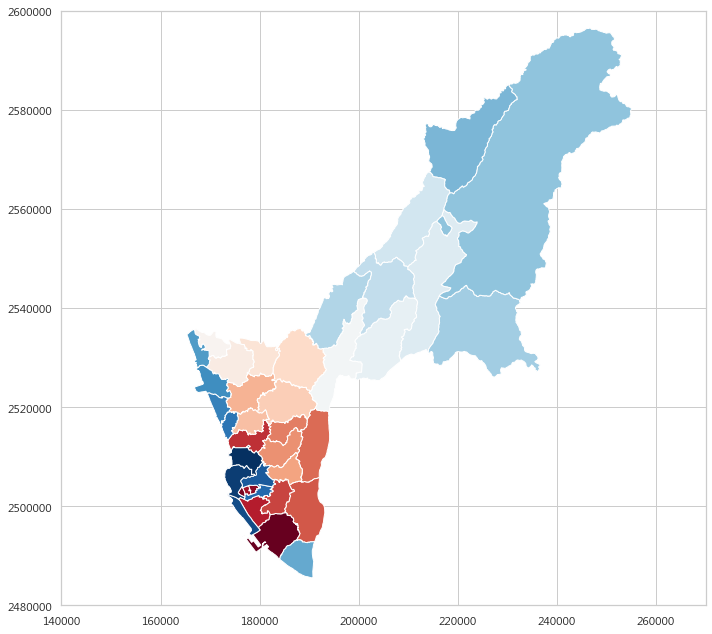

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10,10)) # 定義畫布大小，其中(1,1)代表一行一列，即為一組座標
Kaohsiung_town_shp.plot(cmap='RdBu', ax=ax)
ax.set_xlim([ 140000, 270000]) # 這行設定 X 範圍
ax.set_ylim([ 2480000, 2600000]) # 這行設定 Y 範圍
plt.tight_layout() # 加這行去把圖盡可能推展到 10,15 的版面

### 3-3. 高雄市的"結腸、直腸和肛門癌"地理分佈

#### 把 Kaohsiung_town_shp 和 Kaohsiung_Colorectal_cancer_M_sum 這兩個dataframe合併

- 用merge的話，沒有(0)的行政區會被刪除，這不是我們想要的
- 應用 join，這樣沒有資料的地方會用 na 填入，至少會保留該筆資料。改用 join 把兩個表合起來，後再把 na 的部份填入0。

In [42]:
Kaohsiung_Colorectal_cancer_M_sum#這是我們之前做的高雄各鄉鎮"結腸、直腸和肛門癌"的男性累積人數

,N,District
100年~鄉鎮市區,,
高雄市三民區,50,三民區
高雄市仁武區,11,仁武區
高雄市內門區,4,內門區
高雄市六龜區,3,六龜區
高雄市前金區,6,前金區
高雄市前鎮區,27,前鎮區
高雄市大寮區,13,大寮區
高雄市大樹區,5,大樹區
高雄市大社區,5,大社區


In [49]:
#將上述的資料，放進去高雄市的圖層裡面，成為一個變數
left = Kaohsiung_town_shp.set_index('TOWNNAME') #這個應該是 geopandas 的 GeoDataFrame 物件
right = Kaohsiung_Colorectal_cancer_M_sum.set_index('District') #這應該是 pandas 的 DataFrame 物件

Kaohsiung_ColorectalCancerDistrict = left.join(right) #用 join把兩個dataframe連起來  << 這個 function 是源自 pandas 的 join

Kaohsiung_ColorectalCancerDistrict.head() 

,TOWNID,TOWNCODE,COUNTYNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,N
TOWNNAME,,,,,,,,
小港區,E11,64000110,高雄市,Xiaogang District,E,64000,"POLYGON ((178457.811 2494180.810, 178500.382 2...",20.0
鹽埕區,E01,64000010,高雄市,Yancheng District,E,64000,"POLYGON ((176604.285 2503682.357, 176606.124 2...",4.0
新興區,E06,64000060,高雄市,Xinxing District,E,64000,"POLYGON ((179770.401 2503950.256, 179765.792 2...",14.0
前金區,E07,64000070,高雄市,Qianjin District,E,64000,"POLYGON ((178264.025 2502364.897, 178185.272 2...",6.0
前鎮區,E09,64000090,高雄市,Qianzhen District,E,64000,"POLYGON ((180809.599 2501517.967, 180843.206 2...",27.0


In [50]:
Kaohsiung_ColorectalCancerDistrict['N'] = Kaohsiung_ColorectalCancerDistrict['N'].replace(np.nan, 0)#用取代的功能將nan補0
Kaohsiung_ColorectalCancerDistrict.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,N
TOWNNAME,,,,,,,,
小港區,E11,64000110,高雄市,Xiaogang District,E,64000,"POLYGON ((178457.811 2494180.810, 178500.382 2...",20.0
鹽埕區,E01,64000010,高雄市,Yancheng District,E,64000,"POLYGON ((176604.285 2503682.357, 176606.124 2...",4.0
新興區,E06,64000060,高雄市,Xinxing District,E,64000,"POLYGON ((179770.401 2503950.256, 179765.792 2...",14.0
前金區,E07,64000070,高雄市,Qianjin District,E,64000,"POLYGON ((178264.025 2502364.897, 178185.272 2...",6.0
前鎮區,E09,64000090,高雄市,Qianzhen District,E,64000,"POLYGON ((180809.599 2501517.967, 180843.206 2...",27.0


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


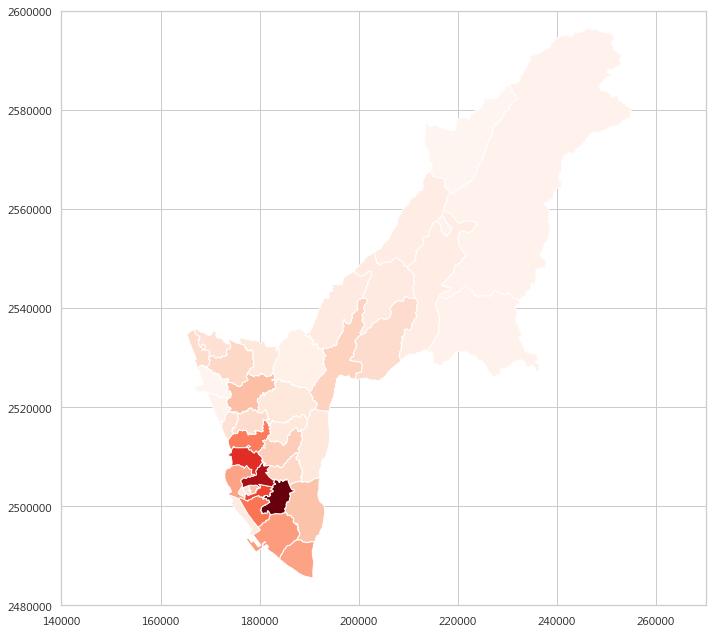

In [45]:
#選擇'N' 這欄位畫出來
fig, ax = plt.subplots(1,1, figsize=(10,10)) # 定義畫布大小，其中(1,1)代表一行一列，即為一組座標
Kaohsiung_ColorectalCancerDistrict.plot(column='N',cmap='Reds', ax=ax)
ax.set_xlim([ 140000, 270000]) # 這行設定 X 範圍
ax.set_ylim([ 2480000, 2600000]) # 這行設定 Y 範圍
plt.tight_layout() # 加這行去把圖盡可能推展到 10,15 的版面


In [47]:
print(type(Kaohsiung_ColorectalCancerDistrict)) # 可以試試看這樣觀察看看是不是 geodataframe

<class 'geopandas.geodataframe.GeoDataFrame'>


In [54]:
#將 Kaohsiung_ColorectalCancerDistrict 輸出成為shp file，往後直接呼叫就不用從頭開始做
Kaohsiung_ColorectalCancerDistrict.to_file("output/Kaohsiung_ColorectalCancerDistrict.shp",encoding='utf-8')

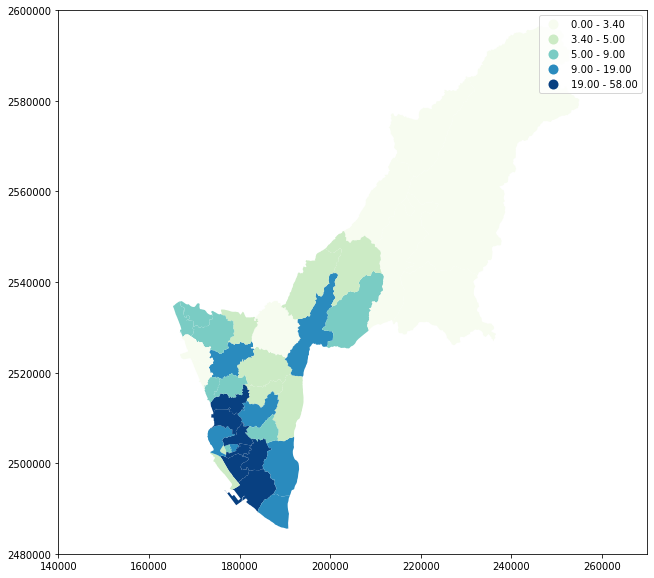

In [52]:
## 測試，先擺著，往後看看可以怎麼做
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
ax.set_xlim([ 140000, 270000]) # 這行設定 X 範圍
ax.set_ylim([ 2480000, 2600000]) # 這行設定 Y 範圍
KCCD.plot(column='N', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax)

>## [PART 4]: 空間自相關

#### [參考資料] 
- https://ithelp.ithome.com.tw/articles/10209784
- http://pysal.org/notebooks/viz/splot/esda_morans_viz.html

空間自相關（Spatial Autocorrelation）是指在空間分布上一個空間單元的現象與其周圍空間單元的相似性。地理統計在現象的空間分布上，將其分布的特性分為「離散（Dispersed）」、「隨機分布（Random）」、「群聚（Clustered）」；「離散」代表一個地理現象與其相似的地理現象在分布上有分散的現象、「群聚」代表地理現象與其相似的地理現象在空間分布上有群聚的現象，而「隨機」代表相似的地理現象在分布上沒有一定的規則

<img src="images/Spatial autocorrelation.JPG" width="70%">

### [因為版本的關係請先在cmd輸入]  update your scikit-learn to latest version
- conda install -c anaconda pysal
- conda install scikit-learn 
- conda install pysal

#### 由上圖可知道，男性的"結腸、直腸和肛門癌"在高雄的分布，看起來有群聚現象
- 群聚現象，可能代表著"空間自相關(Spatial Autocorrelation)"
- 也就是你的鄰居越高，你會越高; 你的鄰居越低，你就越低
- 意即有空間鄰近性(Spatial adjacency)

In [1]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

import pysal as ps
import numpy as np

C:\Users\user\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\user\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
KCCD = gpd.read_file('output/Kaohsiung_ColorectalCancerDistrict.shp',encoding='utf-8') #呼叫另存的高雄圖資
KCCD.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNENG,COUNTYID,COUNTYCODE,N,geometry
0,E11,64000110,高雄市,Xiaogang District,E,64000,20.0,"POLYGON ((178457.811 2494180.810, 178500.382 2..."
1,E01,64000010,高雄市,Yancheng District,E,64000,4.0,"POLYGON ((176604.285 2503682.357, 176606.124 2..."
2,E06,64000060,高雄市,Xinxing District,E,64000,14.0,"POLYGON ((179770.401 2503950.256, 179765.792 2..."
3,E07,64000070,高雄市,Qianjin District,E,64000,6.0,"POLYGON ((178264.025 2502364.897, 178185.272 2..."
4,E09,64000090,高雄市,Qianzhen District,E,64000,27.0,"POLYGON ((180809.599 2501517.967, 180843.206 2..."


#### 在空間自相關的計算上，一般我們要看兩種東西
- Global Measures
- Local Measures

### 4-1. 地理臨近性(adjacency)

#### [我們需要以下套件]. 請自行安裝
- conda install -c udst pandana urbanaccess
- conda install -c conda-forge libpysal
- conda install --channel conda-forge pysal

地理學第一定律由WaldoTobler提出，空間相關性定律
- “All things are related, but nearby things are more related than distant things.”
- 空間相關性，地物之間的相關性與距離有關，一般來說，距離越近，地物間相關性越大；距離越遠，地物間相異性越大。

#### 以下為Moran's I的公式，我們可以看出，需要計算鄰近矩陣的權重

<img src="images/Moran公式.jpg" width="70%">
<img src="images/Wij.jpg" width="70%">

In [36]:
%matplotlib inline
import pysal as ps
import pandas as pd
import numpy as np
#from pysal.contrib.viz import mapping as maps

### 鄰居(neighbor)怎麼算

<img src="images/Queen and Rook contiguity.JPG" width="50%">

In [90]:
#以下我們用Pysal計算spatial weight，採用Queen的相鄰性

import libpysal

In [38]:
wq =  libpysal.weights.Queen.from_dataframe(KCCD) #採用Queen的相鄰性計算方式，把權重算出來
wq.transform = 'r' #  row standardization

In [39]:
#有了spatial Weight，可以計算spatial lag空間間隔

y = KCCD['N']
ylag = libpysal.weights.lag_spatial(wq, y) #計算空間權重

In [40]:
ylag

array([24.2       , 27.5       , 30.33333333, 25.75      , 27.2       ,
       12.5       , 25.66666667, 22.2       ,  8.83333333, 11.75      ,
       22.33333333, 27.4       ,  4.625     , 13.        , 10.        ,
        7.6       ,  8.33333333,  6.8       ,  8.5       ,  4.66666667,
        5.66666667,  3.4       ,  2.        ,  5.6       ,  5.33333333,
        2.        ,  1.75      ,  2.        , 16.5       ,  5.33333333,
        8.        ,  7.        , 12.25      , 25.42857143, 21.66666667,
       22.        , 26.5       , 26.5       ])

In [53]:
import pysal.viz.mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5) #區分成五等分

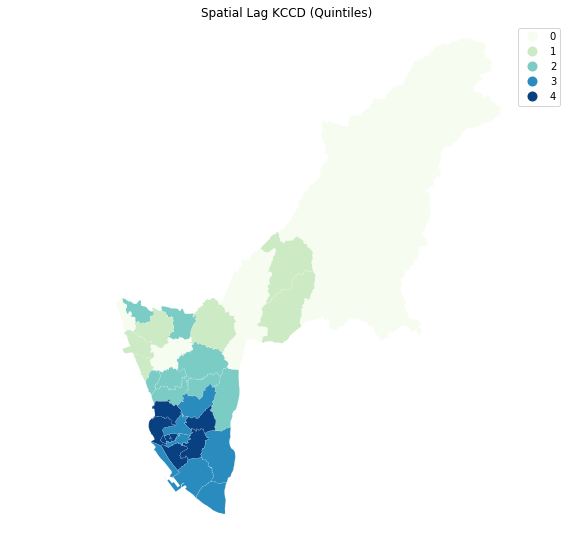

In [56]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_xlim([ 140000, 270000]) # 這行設定 X 範圍
ax.set_ylim([ 2480000, 2600000]) # 這行設定 Y 範圍

KCCD.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag KCCD (Quintiles)")

plt.show()

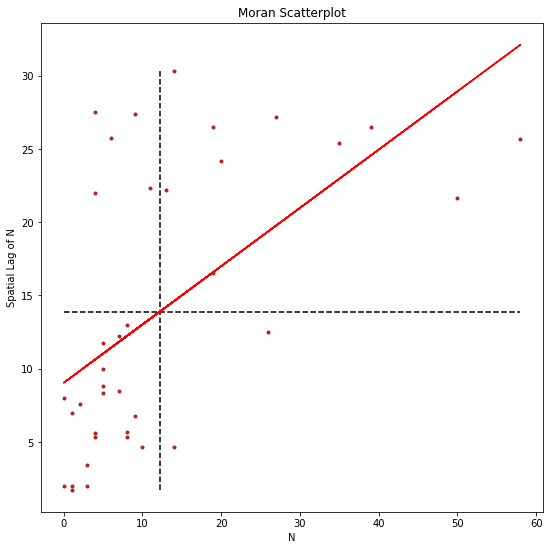

In [57]:
#spatial lag的結果，我們以散布圖與原本的值比較(Moran Scatterplot)看看是否合理

import numpy as np
import matplotlib.pyplot as plt
y = KCCD['N']
b, a = np.polyfit(y, ylag, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(y, ylag, '.', color='firebrick')


plt.vlines(y.mean(), ylag.min(), ylag.max(), linestyle='--')
plt.hlines(ylag.mean(), y.min(), y.max(), linestyle='--')

plt.plot(y, a + b*y, 'r')
plt.title('Moran Scatterplot') ## Moran Scatter Plot
plt.ylabel('Spatial Lag of N')
plt.xlabel('N')
plt.show()

### 4-2. Global Measures: Moran’s I

#### 大量引用自: http://pysal.org/notebooks/viz/splot/esda_morans_viz.html
###  [注意]. 需要額外下載套件
- pip install esda
- pip install splot

<img src="images/Moran公式.jpg" width="70%">

Moran’s I的值會介於-1到1之間，數值越接近-1或1都代表越高度自相關；負值代表該空間自相關現象屬於負相關，趨向「分散」、正值則代表空間自相關現象屬於正相關，趨向「群聚」。數值絕對值越高代表相關性越高，而當值接近0時代表接近隨機分布（或稱沒有空間自相關現象）

<img src="images/Moran.JPG" width="70%">

In [62]:
import esda

In [63]:
mi = esda.moran.Moran(y, wq)
mi.I

0.39762121744715373

#### [小結]. 
- 我們原本的虛無假設(H0)是: 高雄市男性的結腸、直腸和肛門癌的空間分布具隨機性
- 此時 Moran's I 大於零，顯示在整個高雄市上，"男性的結腸、直腸和肛門癌"有空間自相關(不為隨機) 
- 我們可以加以將空間分佈(distribution)畫出來及計算P-Value計算

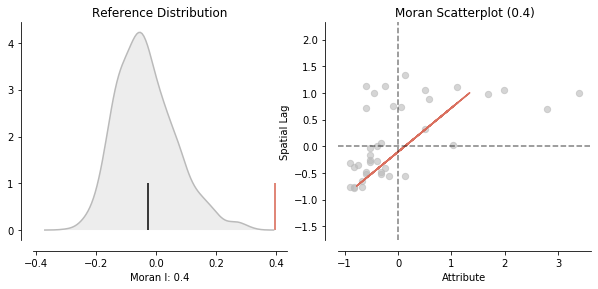

In [96]:
import splot
from splot.esda import plot_moran

plot_moran(mi, zstandard=True, figsize=(10,4)) # 畫出
plt.show()

# Moran Scatterplot 的橫軸代表"你"，綜軸是"你的鄰居"

In [71]:
mi.p_sim #我們的觀察顯著與否，要算P值 (此例有顯著的 Reject H0)

0.001

#### [小結]. P-Value < 0.05，且Moran’I: 0.39為正值，顯示Reject Ho，高雄市男性的結腸、直腸和肛門癌的空間分布不具隨機性(群聚)

### 4-3. Local Measures: LISA

全域性的分析只能告訴我們一個地理現象有沒有自相關的存在，以及現象屬於群聚還是分散；但無法告訴我們有自相關現象的地方在哪裡；因此我們必須進一步透過「區域性空間自相關分析」來得知「有群聚、分散的地方在哪裡」

<img src="images/LISA.JPG" width="70%">

- 「HH」代表自己的值和鄰居們的值都很高；
- 「LL」代表自己的值和鄰居們的值都很低；
- 「HL」代表自己的值高、鄰居們值低；
- 「LH」代表自己的值很低、鄰居們的值很高；
- 「No Significant」代表相關性不顯著。

In [72]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local #計算 Local Moran (就是LISA)


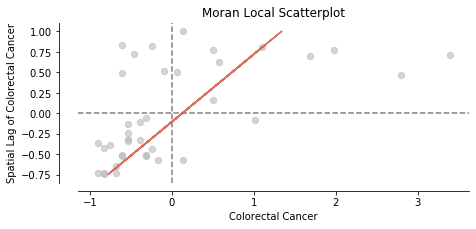

In [75]:
moran_loc = Moran_Local(y, wq)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Colorectal Cancer')
ax.set_ylabel('Spatial Lag of Colorectal Cancer')
plt.show()

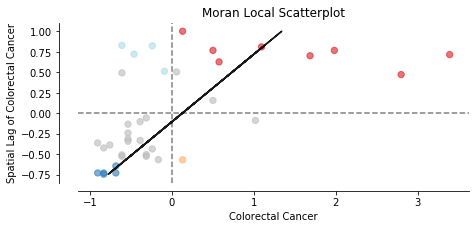

In [76]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Colorectal Cancer')
ax.set_ylabel('Spatial Lag of Colorectal Cancer')
plt.show()

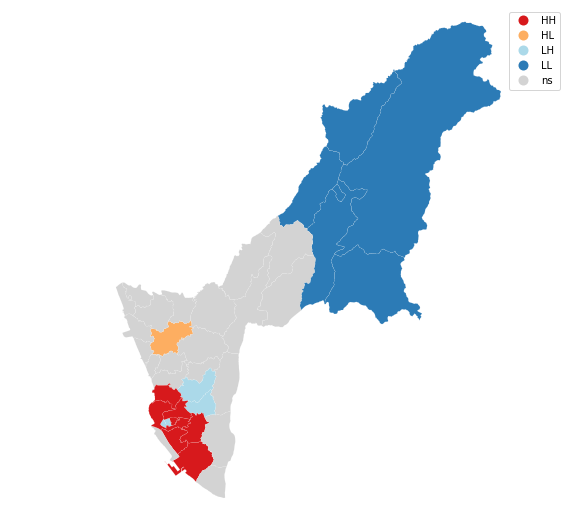

In [81]:
from splot.esda import lisa_cluster

f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_xlim([ 140000, 270000]) # 這行設定 X 範圍
ax.set_ylim([ 2480000, 2600000]) # 這行設定 Y 範圍
lisa_cluster(moran_loc, KCCD, p=0.05, ax=ax)

plt.show()

<img src="images/khsLISA.JPG" width="90%">

### [後續建議]
- 理論上，所有的出圖都應該要有指北針與比例尺
- 但在PYTHON上，指北針與比例尺的"圖例"並不甚美觀
- 因此建議，可以將圖以Qgis或 ArcGIS添加指北針與比例尺

### [誌謝]
- 本篇文章大量參考 "From Pandas to GeoPandas - 地理資料處理與分析" (https://tw.pycon.org/2016/en-us/events/talk/69477625352945724/)
- 特此感謝作者 倪鈵斯

### Reference
- http://pysal.org/notebooks/viz/splot/esda_morans_viz.html

### [後記]
- 我們目前證明大腸癌在高雄的確有顯著的空間群聚。我們採用了空間自相關的方式證明
- 但究竟是甚麼原因造成空間群聚? 我們需要有另外的資料集，也許是水質? 也許是餐廳資料? 也許是運動公園空間? 後續可以使用空間迴歸模型證明變數的相關性
